# Sales Prediction Using Python

# Importing The Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import warnings

# ACCESSING THE DATASET

In [2]:
data = pd.read_csv("advertising.csv")
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


# INSPECTING THE DATASET

In [3]:
data.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
data.shape

(200, 4)

In [6]:
data.rename(columns={'Unnamed: 0': 'Index'}, inplace=True)

In [7]:
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [8]:
#checking the missing values
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,15.1305,5.283892,1.6,11.000,16.00,19.050,27.0


In [10]:
data.isnull().values.any()
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

# PLOTTING THE DATA

<Axes: >

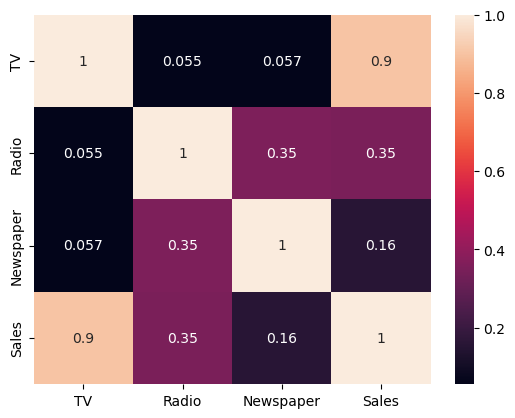

In [11]:
sns.heatmap(data.corr(),annot=True)

<Axes: >

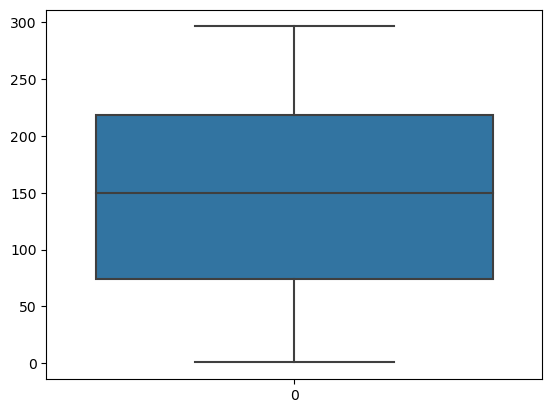

In [12]:
sns.boxplot(data["TV"])

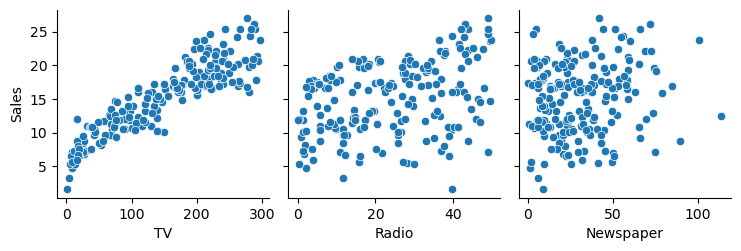

In [13]:
sns.pairplot(data,x_vars=['TV','Radio','Newspaper'],y_vars='Sales')
plt.show()

array([[<Axes: title={'center': 'TV'}>,
        <Axes: title={'center': 'Radio'}>],
       [<Axes: title={'center': 'Newspaper'}>,
        <Axes: title={'center': 'Sales'}>]], dtype=object)

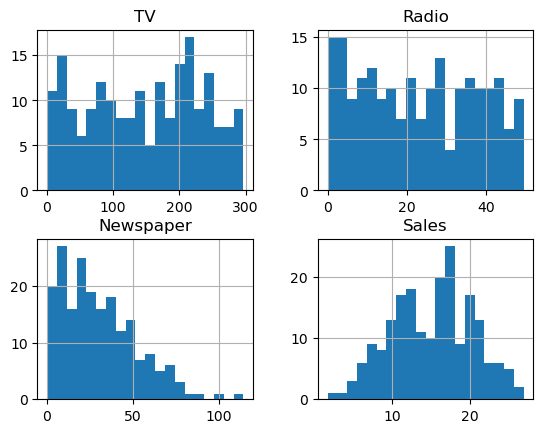

In [14]:
data.hist(bins=20)

# Model preparation

In [15]:
X = data.drop('Sales', axis=1)
y = data[["Sales"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=46)

In [16]:
lin_model = sm.ols(formula="Sales ~ TV + Radio + Newspaper", data=data).fit()

In [17]:
print(lin_model.params, "\n")

Intercept    4.625124
TV           0.054446
Radio        0.107001
Newspaper    0.000336
dtype: float64 



In [18]:
print(lin_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     605.4
Date:                Tue, 08 Aug 2023   Prob (F-statistic):           8.13e-99
Time:                        00:59:37   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             774.7
Df Residuals:                     196   BIC:                             787.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6251      0.308     15.041      0.0

# Training &Testing Data

In [19]:
from sklearn.model_selection import train_test_split
x = data.drop('Sales', axis=1)
y= data['Sales']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [20]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 3)
(40, 3)
(160,)
(40,)


In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

model = LinearRegression()
model.fit(x_train,y_train)
predictions=model.predict(x_test)

In [22]:
from sklearn.metrics import r2_score, mean_squared_error
print("R2 score:", r2_score(y_test, predictions))
print("Mean squared error:", mean_squared_error(y_test, predictions))

R2 score: 0.9059011844150826
Mean squared error: 2.907756910271092


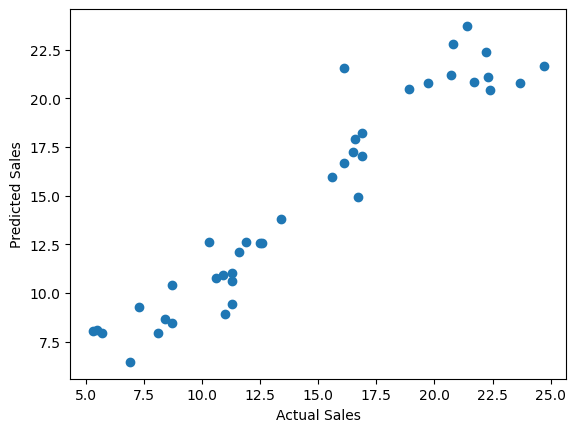

In [23]:
plt.scatter(y_test, predictions)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.show()

# LinearRegression

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
lin_reg=LinearRegression()
lin_reg.fit(x_train,y_train)

LinearRegression()

In [26]:
lin_score=print(lin_reg.score(x_train,y_train))

0.9001416005862131


In [27]:
y_pred_lin=lin_reg.predict(x_test)

In [28]:
from sklearn.metrics import r2_score, mean_squared_error

In [29]:
r2_score_lin=r2_score(y_test,y_pred_lin)
r2_score_lin

0.9059011844150826

In [30]:
mse_lin=mean_squared_error(y_test,y_pred_lin)
mse_lin

2.907756910271092

In [31]:
rmse_lin=np.sqrt(mse_lin)
rmse_lin

1.705214622934923

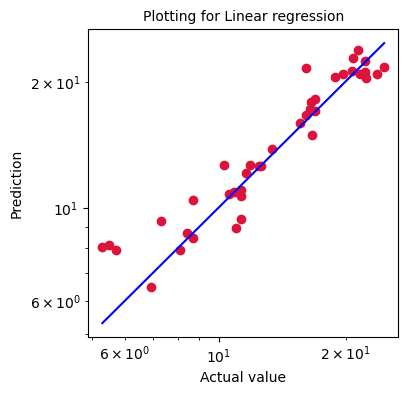

In [32]:
plt.figure(figsize=(4,4))
plt.scatter(y_test,y_pred_lin,c="crimson")
plt.yscale("log")
plt.xscale("log")
p1=max(max(y_pred_lin), max(y_test))
p2=min(min(y_pred_lin), min(y_test))
plt.plot([p1,p2],[p1,p2],"b-")
plt.xlabel("Actual value",fontsize=10)
plt.ylabel("Prediction",fontsize=10)
plt.title("Plotting for Linear regression",fontsize=10)
plt.show()

In [33]:

results = []
names = []

In [34]:
models = [('LinearRegression', LinearRegression())]

In [35]:
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    result = np.sqrt(mean_squared_error(y_test, y_pred))
    results.append(result)
    names.append(name)
    msg = "%s: %f" % (name, result)
    print(msg)

LinearRegression: 5.588216


In [36]:
new_data = pd.DataFrame({'TV': [100], 'Radio': [50], 'Newspaper': [25]})
predicted_sales = lin_model.predict(new_data)
print("Predicted Sales:", predicted_sales)

Predicted Sales: 0    15.428155
dtype: float64


In [37]:
new_data = pd.DataFrame({'TV': [25], 'Radio': [63], 'Newspaper': [80]})
predicted_sales = lin_model.predict(new_data)
print("Predicted Sales:", predicted_sales)

Predicted Sales: 0    12.754199
dtype: float64
